In [77]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Interpretation: The variable Sex is categorical. All the other variables are numerical.

In [80]:
df.shape

(4177, 9)

In [81]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


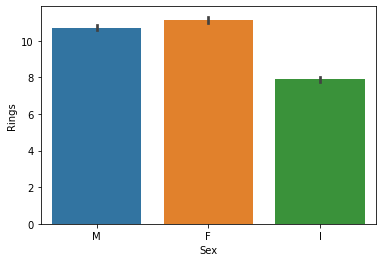

In [82]:
ax = sns.barplot(data=df, x='Sex', y='Rings')

In [83]:
df.isnull().sum()
#Since there is no null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Univariate Analysis

In [177]:
df.apply(lambda x: len(x.unique()))

Sex                  3
Length             112
Diameter            89
Height              41
Whole weight      2220
Shucked weight    1396
Viscera weight     804
Shell weight       831
Rings               12
dtype: int64

# Bivariate analysis

C:\Users\PRAVEEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


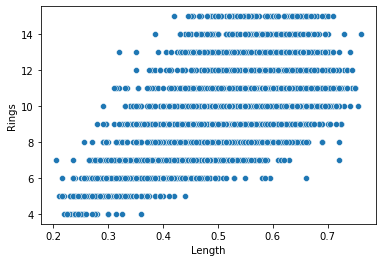

In [186]:
ax = sns.scatterplot('Length', 'Rings', data = df)
plt.show()

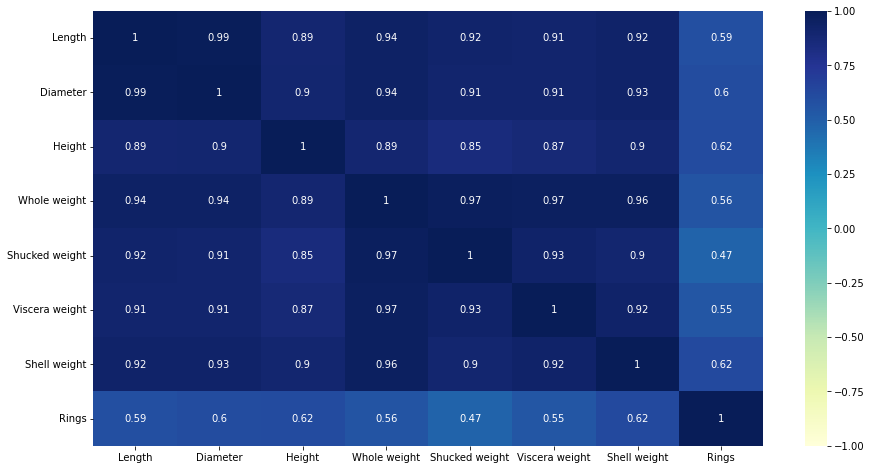

In [187]:
plt.rcParams["figure.figsize"] = [15,8]
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)
plt.show()

# Multivariate analysis

C:\Users\PRAVEEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


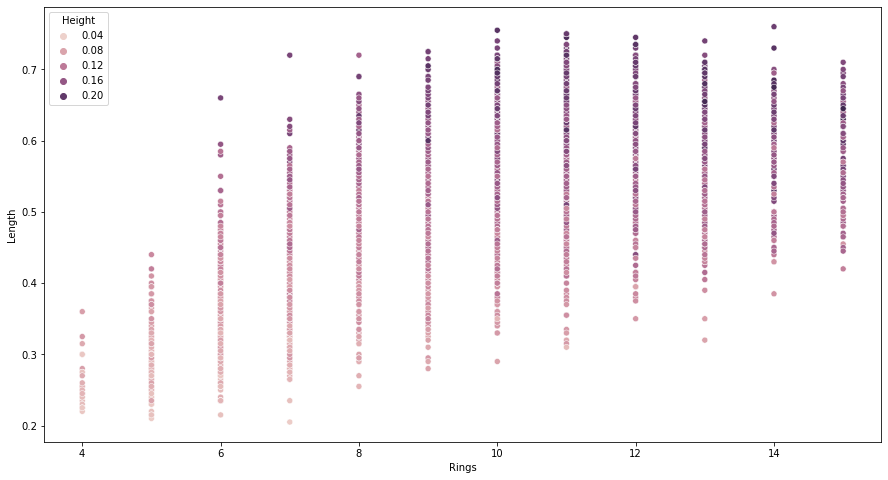

In [191]:
sns.scatterplot('Rings', 'Length', data = df, hue='Height')
plt.show()

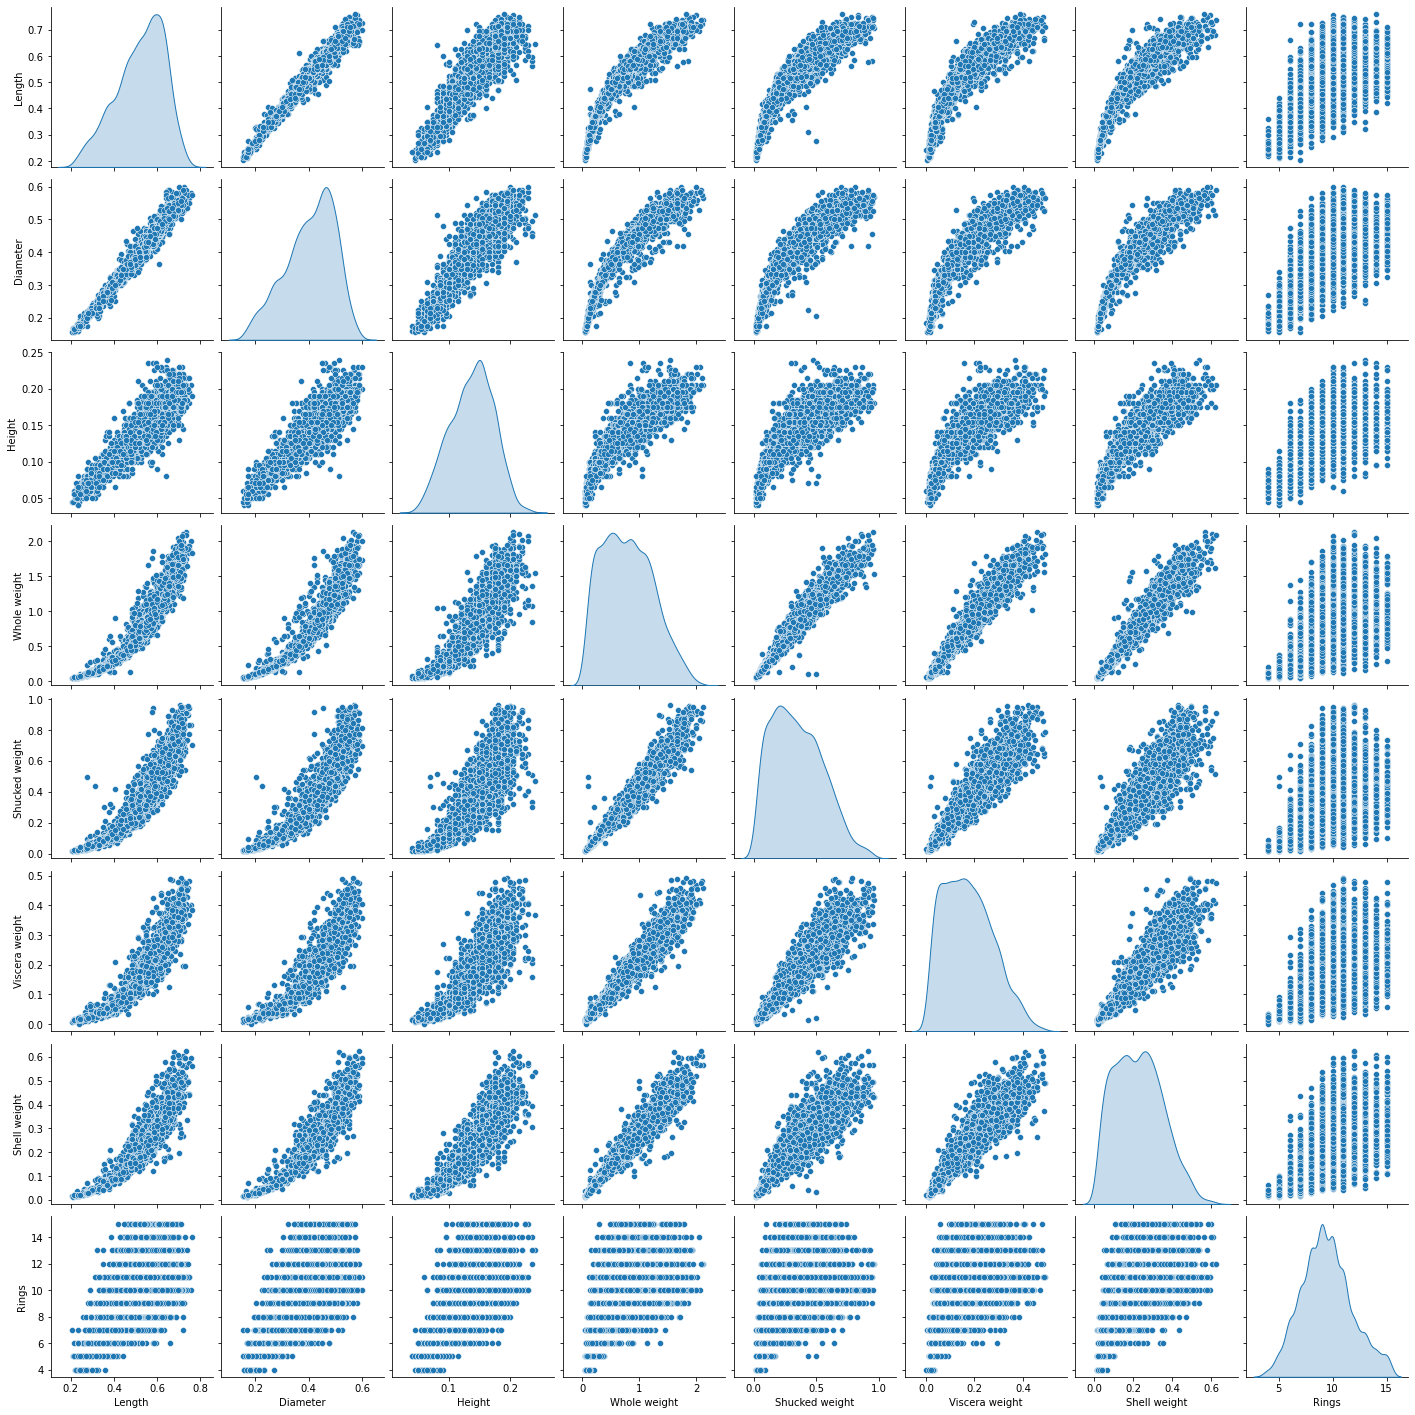

In [192]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

# Outlier Analysis and Treatment

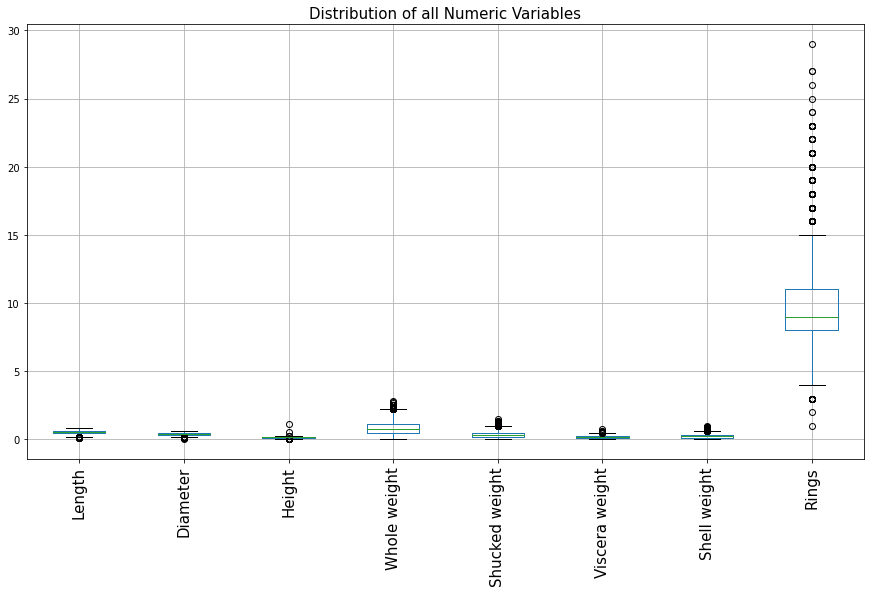

In [84]:
plt.figure(figsize = (15,8))
df.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

Notice that the variables 'Rings' have a quite large range as compared to
the other variables. 
Thus, it is difficult to see the outliers in such variables.

# Plot the boxplot of the target (dependent) variable 'Rings'.

C:\Users\PRAVEEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


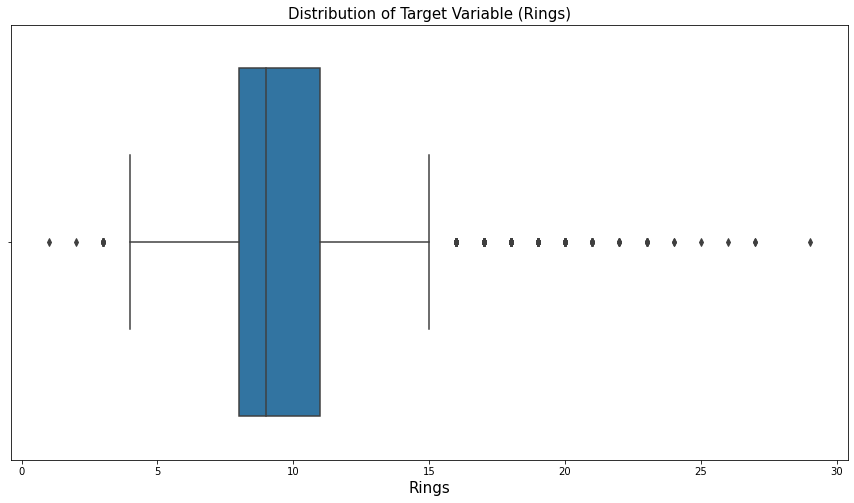

In [85]:
plt.figure(figsize = (15,8))
sns.boxplot(df['Rings'])
plt.title('Distribution of Target Variable (Rings)', fontsize = 15)
plt.xlabel('Rings', fontsize = 15)
plt.show()

Interpretation: From the above plots, we notice that all the variables have points above the upper extreme and below the lower extreme - these points are outliers in the data. However, the exact location of these points i precisely seen.

Let us use the IQR method to remove the outliers.

In [86]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df.shape

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2262755065.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


(3781, 9)

After outlier removed the target variable ('Rings')

C:\Users\PRAVEEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


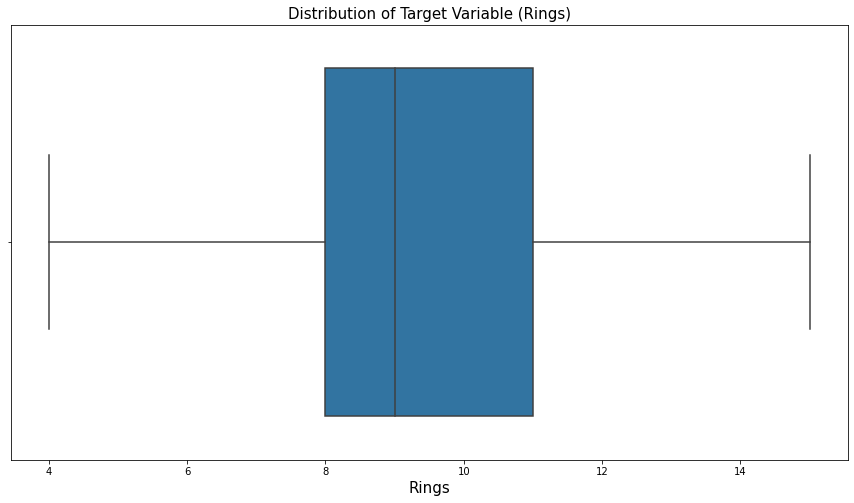

In [87]:
plt.figure(figsize = (15,8))
sns.boxplot(df['Rings'])
plt.title('Distribution of Target Variable (Rings)', fontsize = 15)
plt.xlabel('Rings', fontsize = 15)
plt.show()

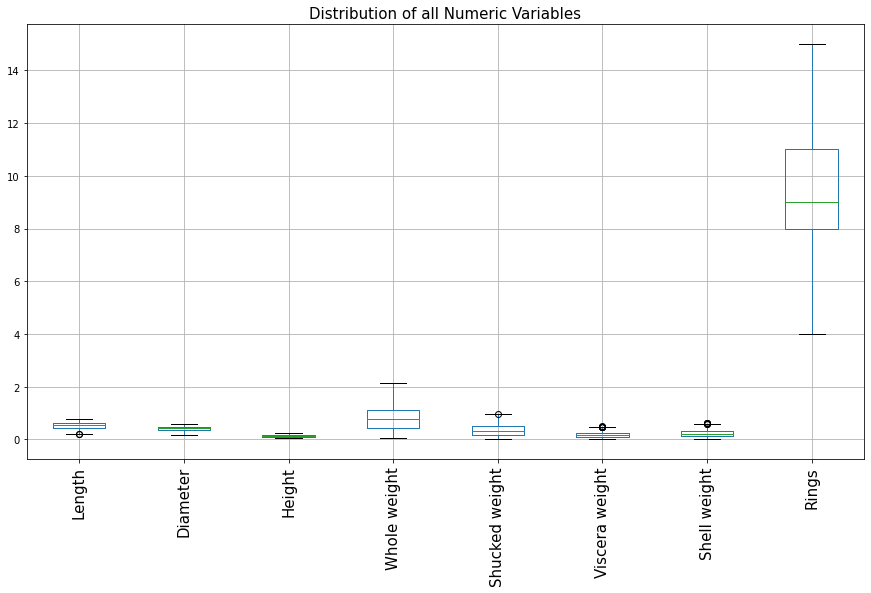

In [88]:
plt.figure(figsize = (15,8))
df.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [92]:
df.shape

(3781, 9)

# Missing Value Analysis and Treatment

In [90]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0


Interpretation: There are no missing values in the data.

In [99]:
df_target = df['Rings']
df_feature = df.drop('Rings', axis = 1)

# Numerical column

In [100]:
df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

# Categorical columns

In [101]:
df_cat = df_feature.select_dtypes(include = [np.object])
df_cat.columns

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2730361338.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df_feature.select_dtypes(include = [np.object])


Index(['Sex'], dtype='object')

In [111]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
dummy_var = pd.DataFrame(encode.fit_transform(df[['Sex']]).toarray(), columns = ['M','F','I'])
dummy_var.head()

,M,F,I
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


# Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [64]:
from sklearn.preprocessing import StandardScaler 

In [105]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)
y = (df_target - df_target.mean()) / df_target.std()

Concatenate scaled numerical and dummy encoded categorical variables.

In [109]:
X = pd.concat([df_num_scaled, dummy_var], axis = 1)
X.head()
X.shape

(3781, 10)

# Train-Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3024, 10)
y_train (3024,)
X_test (757, 10)
y_test (757,)


# Create generalized functions to calculate various metrics for models
Create a generalized function to calculate the RMSE for train and test set.

In [126]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [127]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [128]:
def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

Create a generalized function to calculate the MAPE for test set.

In [116]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [117]:
def get_score(model):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

# Create a generalized function to create a dataframe containing the scores from all the models

In [154]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

# generalized function to plot a barchart for the coefficients

In [119]:
def plot_coefficients(model, algorithm_name):
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

# MLR model on a training dataset.

In [120]:
from sklearn.linear_model import LinearRegression

In [142]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.5158498381115667

In [143]:
print('RMSE on train set: ', get_train_rmse(MLR_model))
print('RMSE on test set: ', get_test_rmse(MLR_model))
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.694
RMSE on test set:  0.728
Difference between RMSE on train and test set:  0.03400000000000003


Interpretation: RMSE on the training set is 0.694,
while on the test set it is 0.728. We can see that there is a 
small difference in the RMSE of the train and the test set. 
This implies that our model has goodfitted on the train set.

In [155]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343


# MLR model using SGD method.

In [132]:
from sklearn.linear_model import SGDRegressor

In [145]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 0.6972
RMSE on test set: 0.7336


In [ ]:
#since it is a good fit

Visualize the change in values of coefficients obtained from MLR_model (using OLS) and linreg_with_SGD

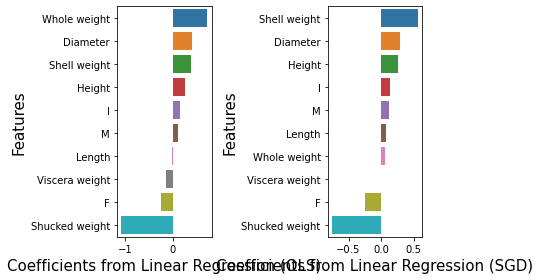

In [134]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')
plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')
plt.tight_layout()
plt.show()

In [156]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343
1,Linear Regression (using SGD),-,-,0.511452,0.509831,0.7336,110.413435


In [149]:

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

Build regression model using Ridge Regression for alpha = 1.

In [150]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.7281


Interpretation: After applying the 
    ridge regression with alpha equal to one, 
    we get 0.7281 as the RMSE value.

In [157]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343
1,Linear Regression (using SGD),-,-,0.511452,0.509831,0.7336,110.413435
2,Ridge Regression (with alpha = 1),1,-,0.515794,0.514187,0.7282,110.40668


regression model using Ridge Regression for alpha = 2.

In [152]:
ridge = Ridge(alpha = 2, max_iter = 500)
ridge.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.7282


Interpretation: After applying the ridge regression with alpha equal to two, the RMSE value decreased to 0.7282.

In [158]:
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343
1,Linear Regression (using SGD),-,-,0.511452,0.509831,0.7336,110.413435
2,Ridge Regression (with alpha = 1),1,-,0.515794,0.514187,0.7282,110.40668
3,Ridge Regression (with alpha = 2),2,-,0.515794,0.514187,0.7282,110.40668


Lasso Regression


In [159]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.7343


In [160]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343
1,Linear Regression (using SGD),-,-,0.511452,0.509831,0.7336,110.413435
2,Ridge Regression (with alpha = 1),1,-,0.515794,0.514187,0.7282,110.40668
3,Ridge Regression (with alpha = 2),2,-,0.515794,0.514187,0.7282,110.40668
4,Lasso Regression,0.01,-,0.508115,0.506483,0.7343,109.565848


# Elastic Net Regression

In [161]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
enet.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.7452


Interpretation: With the elastic-net regression, we get 0.7452 as the RMSE value.

In [162]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343
1,Linear Regression (using SGD),-,-,0.511452,0.509831,0.7336,110.413435
2,Ridge Regression (with alpha = 1),1,-,0.515794,0.514187,0.7282,110.40668
3,Ridge Regression (with alpha = 2),2,-,0.515794,0.514187,0.7282,110.40668
4,Lasso Regression,0.01,-,0.508115,0.506483,0.7343,109.565848
5,Elastic Net Regression,0.1,0.01,0.482484,0.480767,0.7452,107.896724


GridSearchCV

In [163]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
ridge_grid.fit(X_train, y_train)
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(ridge_grid))

C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.80069e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.91122e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.91635e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.73266e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Best parameters for Ridge Regression:  {'alpha': 1} 

RMSE on test set: 0.7281


In [164]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343
1,Linear Regression (using SGD),-,-,0.511452,0.509831,0.7336,110.413435
2,Ridge Regression (with alpha = 1),1,-,0.515794,0.514187,0.7282,110.40668
3,Ridge Regression (with alpha = 2),2,-,0.515794,0.514187,0.7282,110.40668
4,Lasso Regression,0.01,-,0.508115,0.506483,0.7343,109.565848
5,Elastic Net Regression,0.1,0.01,0.482484,0.480767,0.7452,107.896724
6,Ridge Regression (using GridSearchCV),1,-,0.515835,0.514228,0.7281,110.412508


Lasso Regression

In [165]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
lasso_grid.fit(X_train, y_train)
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(lasso_grid))

C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.433e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.600e+02, tolerance: 2.708e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.549e+02, to

C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.083e+02, tolerance: 2.708e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.460e+02, tolerance: 2.694e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.773e+02, to

Best parameters for Lasso Regression:  {'alpha': 0.0001} 

RMSE on test set: 0.728


In [166]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343
1,Linear Regression (using SGD),-,-,0.511452,0.509831,0.7336,110.413435
2,Ridge Regression (with alpha = 1),1,-,0.515794,0.514187,0.7282,110.40668
3,Ridge Regression (with alpha = 2),2,-,0.515794,0.514187,0.7282,110.40668
4,Lasso Regression,0.01,-,0.508115,0.506483,0.7343,109.565848
5,Elastic Net Regression,0.1,0.01,0.482484,0.480767,0.7452,107.896724
6,Ridge Regression (using GridSearchCV),1,-,0.515835,0.514228,0.7281,110.412508
7,Lasso Regression (using GridSearchCV),0.0001,-,0.515846,0.514239,0.728,110.405968


Elastic Net Regression

In [167]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(X_train, y_train)
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(enet_grid))

C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.360e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.525e+02, tolerance: 2.708e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.458e+02, to

C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.807e+02, tolerance: 2.708e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.881e+02, tolerance: 2.694e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.979e+02, to

C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.732e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.717e+00, tolerance: 2.708e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.873e+00, to

C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.098e-01, tolerance: 2.694e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.316e-01, tolerance: 2.724e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.238e-01, to

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on test set: 0.728


C:\Users\PRAVEEN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.284e+00, tolerance: 3.009e-01
  model = cd_fast.enet_coordinate_descent(


# Measure the performance using Metrics.

In [168]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))
score_card

C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_704\2826487418.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.51585,0.514243,0.728,110.41343
1,Linear Regression (using SGD),-,-,0.511452,0.509831,0.7336,110.413435
2,Ridge Regression (with alpha = 1),1,-,0.515794,0.514187,0.7282,110.40668
3,Ridge Regression (with alpha = 2),2,-,0.515794,0.514187,0.7282,110.40668
4,Lasso Regression,0.01,-,0.508115,0.506483,0.7343,109.565848
5,Elastic Net Regression,0.1,0.01,0.482484,0.480767,0.7452,107.896724
6,Ridge Regression (using GridSearchCV),1,-,0.515835,0.514228,0.7281,110.412508
7,Lasso Regression (using GridSearchCV),0.0001,-,0.515846,0.514239,0.728,110.405968
8,Elastic Net Regression (using GridSearchCV),0.0001,0.2,0.515848,0.514241,0.728,110.411338


Interpretation: We can see that Elastic Net Regression (using GridSearchCV),Lasso Regression (using GridSearchCV),Ridge Regression (using GridSearchCV),Ridge Regression (with alpha = 2),Ridge Regression (with alpha = 1),Linear Regression has the lowest test RMSE = 0.728. so the respective above model are good fit depends on RMSE score and also compare with train and test split.